In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()
files = sorted(glob.glob("classified/nz_tweets*.csv"))
print(files)
pd.set_option('display.max_colwidth', -1)

['classified/nz_tweets_2010.csv', 'classified/nz_tweets_2011.csv', 'classified/nz_tweets_2012.csv', 'classified/nz_tweets_2013.csv', 'classified/nz_tweets_2014.csv', 'classified/nz_tweets_2015.csv', 'classified/nz_tweets_2016.csv', 'classified/nz_tweets_2017.csv', 'classified/nz_tweets_2018.csv', 'classified/nz_tweets_2019.csv']


In [2]:
%%time
df = pd.concat(pd.read_csv(f, sep=';', engine="python") for f in files)

CPU times: user 2min 41s, sys: 9.32 s, total: 2min 50s
Wall time: 2min 50s


In [94]:
print(len(df))

6446147


In [11]:
%%time
df.timestamp = pd.to_datetime(df.timestamp)
df.index = df.timestamp

CPU times: user 2.83 s, sys: 2.63 s, total: 5.46 s
Wall time: 5.44 s


In [23]:
df.columns

Index(['username', 'fullname', 'user_id', 'tweet_id', 'tweet_url', 'timestamp',
       'timestamp_epochs', 'replies', 'retweets', 'likes', 'is_retweet',
       'retweeter_username', 'retweeter_userid', 'retweet_id', 'text', 'html',
       'text_with_emoji', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

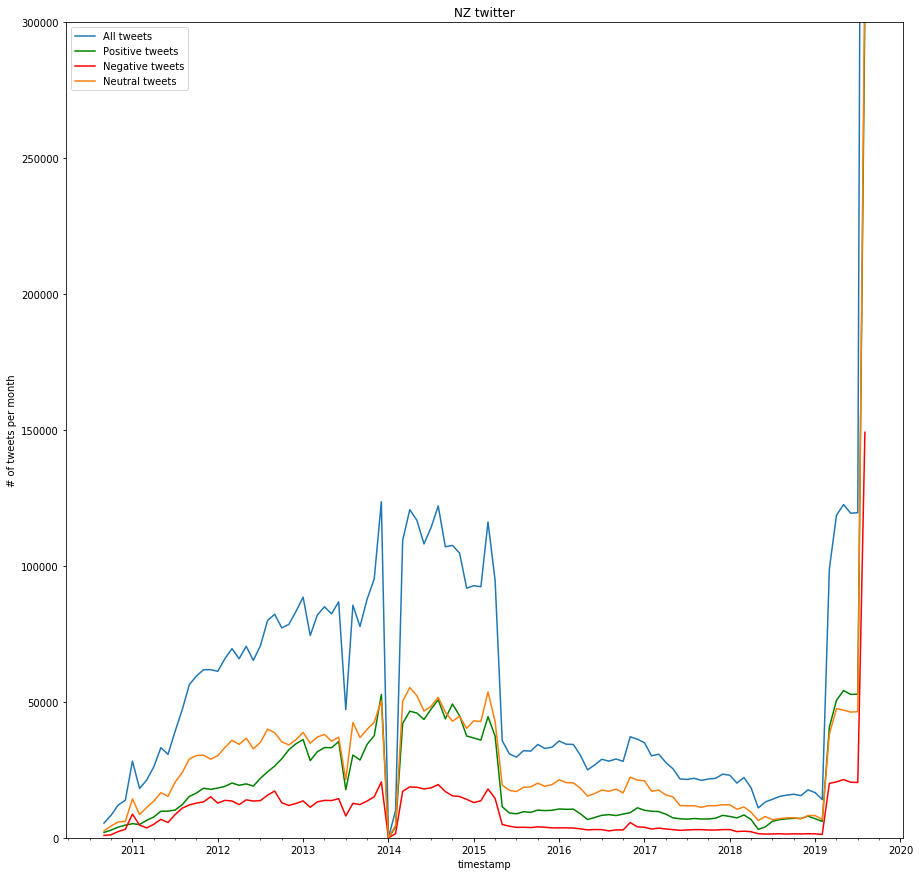

In [61]:
df.timestamp.resample("M").count().plot(figsize=(15,15), title="NZ twitter", ylim=(0,3e5))
df.timestamp[df["compound"] > 0.05].resample("M").count().plot(color='g')
df.timestamp[df["compound"] < -0.05].resample("M").count().plot(color='r')
df.timestamp[df["compound"].between(-.05, .05)].resample("M").count().plot()
plt.legend(["All tweets", "Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()

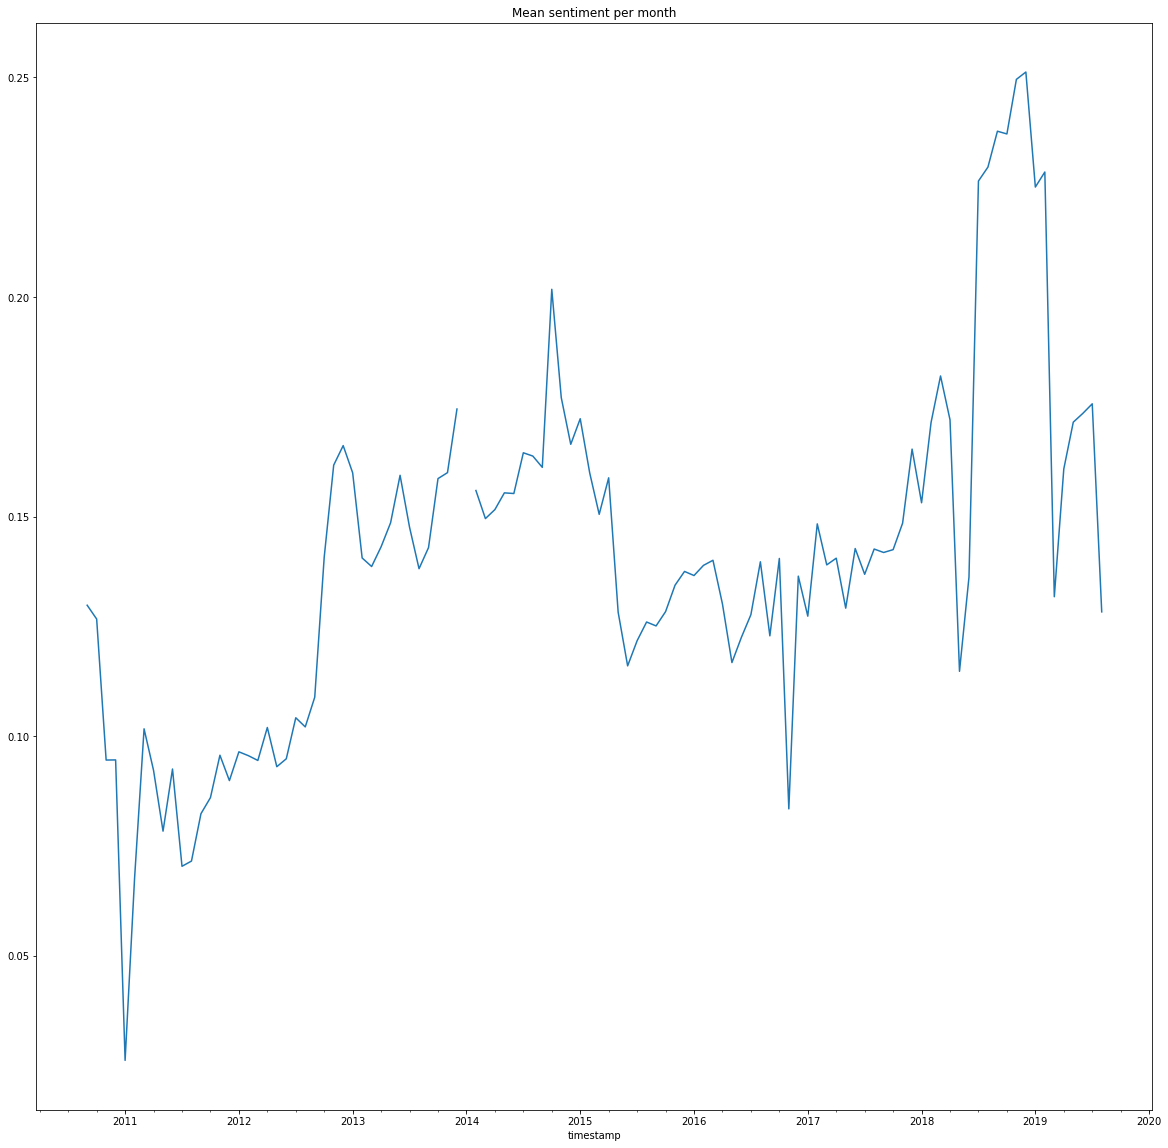

In [58]:
df["compound"].resample("M").mean().plot(figsize=(20,20), title="Mean sentiment per month")

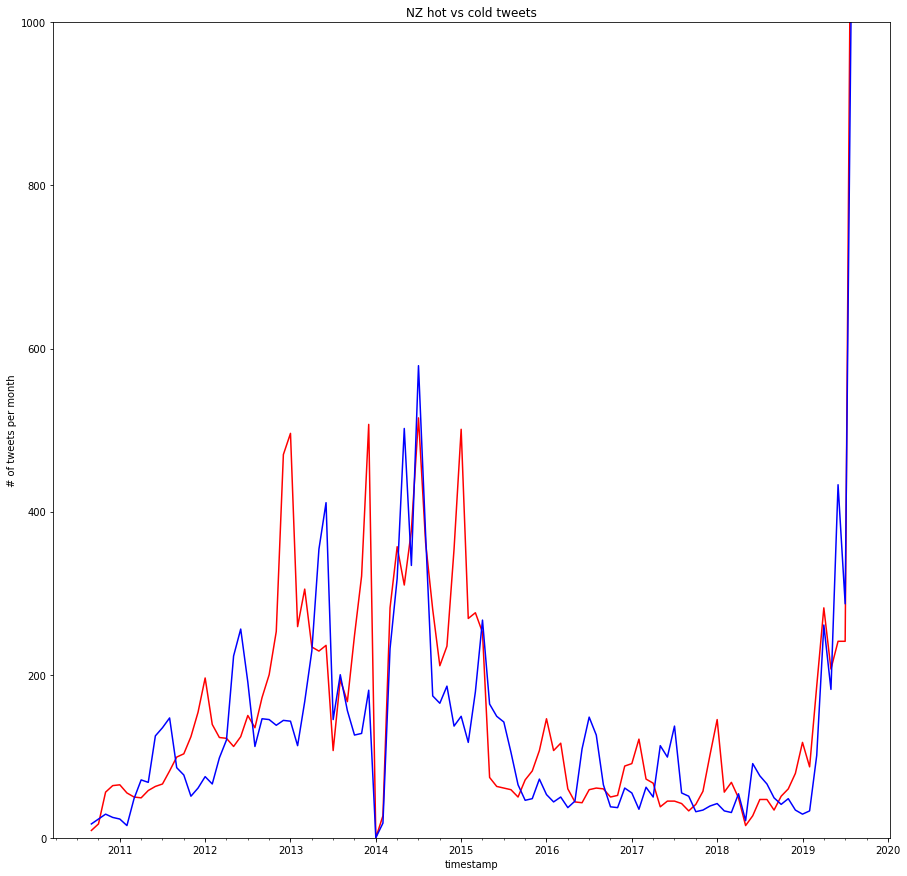

In [71]:
df.timestamp[df.text.str.contains(r"\bhot\b", na=False)].resample("M").count().plot(figsize=(15, 15), title="NZ hot vs cold tweets", color="r", ylim=(0,1000))
df.timestamp[df.text.str.contains(r"\bcold\b", na=False)].resample("M").count().plot(color="b")
plt.ylabel("# of tweets per month")
plt.show()

In [99]:
environmental_tweets = df[df.text.str.contains("global warming|climate change|sea level rise|sea-level rise|sealevel rise", na=False)]
print(len(environmental_tweets))

2041


In [100]:
environmental_tweets.sort_values(by="compound", ascending=False)[["text_with_emoji", "compound"]]

,text_with_emoji,compound
timestamp,,
2019-08-08 06:35:58,Kia Kaha John. Best of luck with new role. It’s been a pleasure working with you. You have been a great champion of climate change and as you say you have established a formidable team. Good luck to you and your family with your new adventure. Regards from me and #TeamADO,0.9716
2019-08-15 06:17:08,"Flying. So unable to take a high ground on climate change. \nRugby players. Best not to mention religion or the word gay. \nSo that just leaves discussing how long before they elect a new pm. On the other hand, best not. \nTalk gardening n our awesome NZ produce 😊",0.9709
2019-04-11 04:44:50,BRILLIANT 😂 😂 😂 “This Government has a fine record on climate change” @10DowningStreet you have a great sense of humour https://twitter.com/CarolineLucas/status/1115956748114898944 …,0.9692
2019-06-27 09:42:31,"So proud of 'climate change' specialists James Hughes @Jamorito , Bekah Robertson + Morgan Lindsay on winning the excellence @ipweanz award tonight for their groundbreaking work with @lgnz on national sea level rise exposure 👏🏽 👏🏽 🔆 🎈 🔆 pic.twitter.com/CcbxycqH3q",0.9647
2019-05-08 00:09:47,"Lol, climate change my sister! Zero Carbon - I was reading some of your messages. But also, love your mahi and love following your korero 👊🏽",0.9412
2019-08-08 02:51:44,Thanks for your helpful reply. I'll be taking a closer look. I encourage you to expand to include those important uses of private land too. We need data to see landscapes differently if we are to come up with innovative solutions for pressing biodiversity & climate change crises.,0.9403
2019-08-12 03:01:32,"Want to be high value producers, environmentally excellent. Farming systems resilient from climate change. Our absolute objective should be abundant clean healthy water & that will be profitable, wont be supported as a sector to build water storage unless clean up water quality.",0.9375
2019-08-10 07:28:18,"Good question.\nSo under which Mayor would Auckland add *least* to the harm climate change is doing?\nGood that Palino could help get the jobs closer to the workers.. but like Tamihere, clearly happy for car-users to continue polluting with impunity.\nGoff for now, then. https://twitter.com/damianlight/status/1159992245052821504 …",0.9366
2019-08-15 21:02:13,"Not read (paywalled), but seems clear climate change will increasingly ensure (everywhere) that control of water supply grows more significant.\nIt's also making one location ever more attractive than another to own land. https://twitter.com/nytimes/status/1161963258733088769 …",0.9291


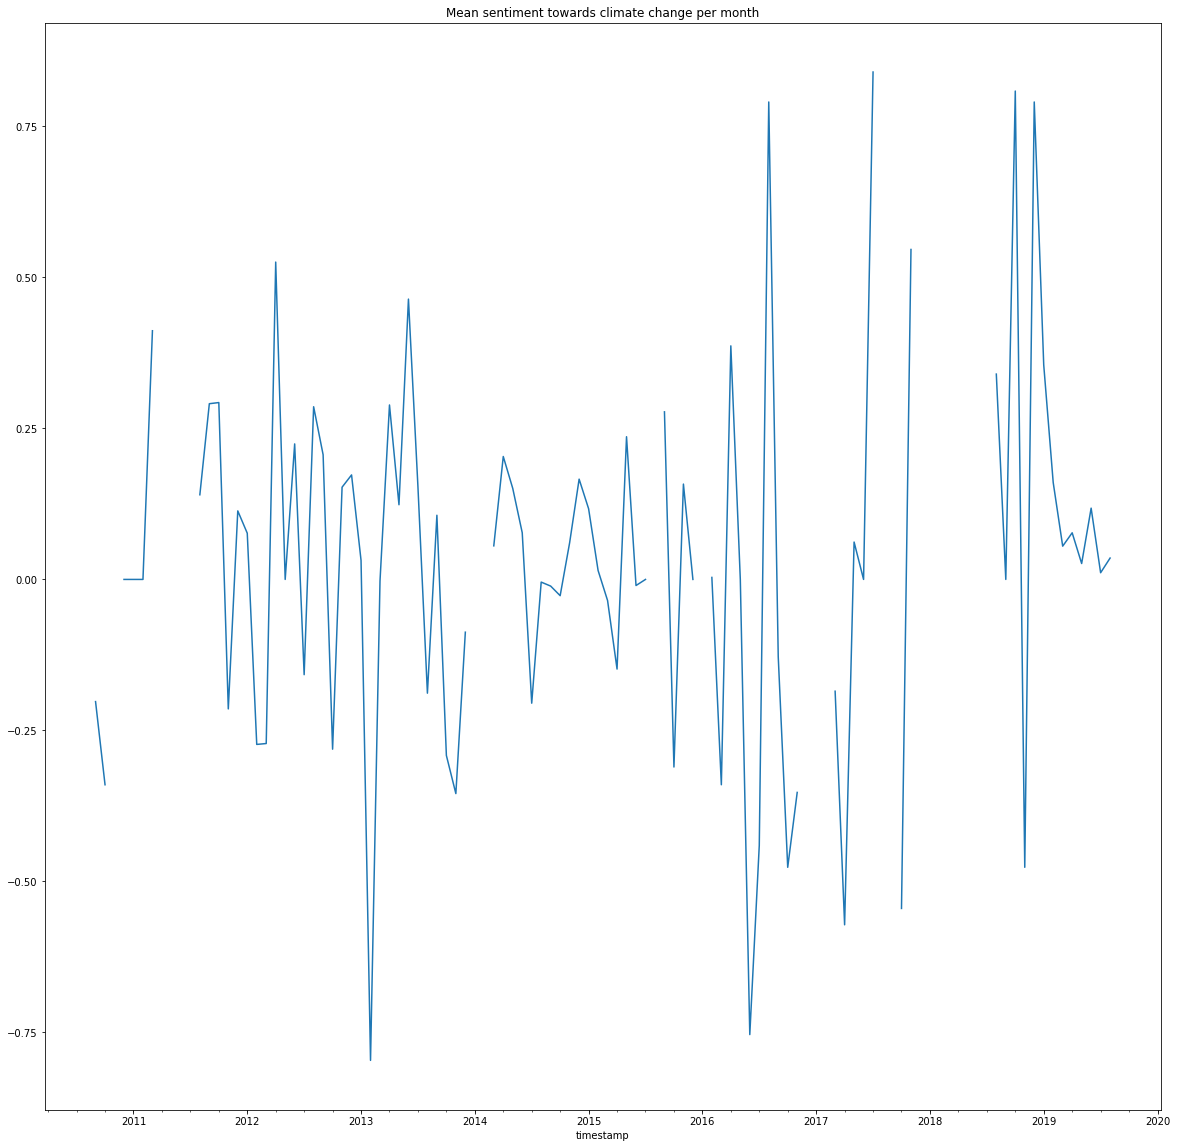

In [101]:
environmental_tweets["compound"].resample("M").mean().plot(figsize=(20,20), title="Mean sentiment towards climate change per month")

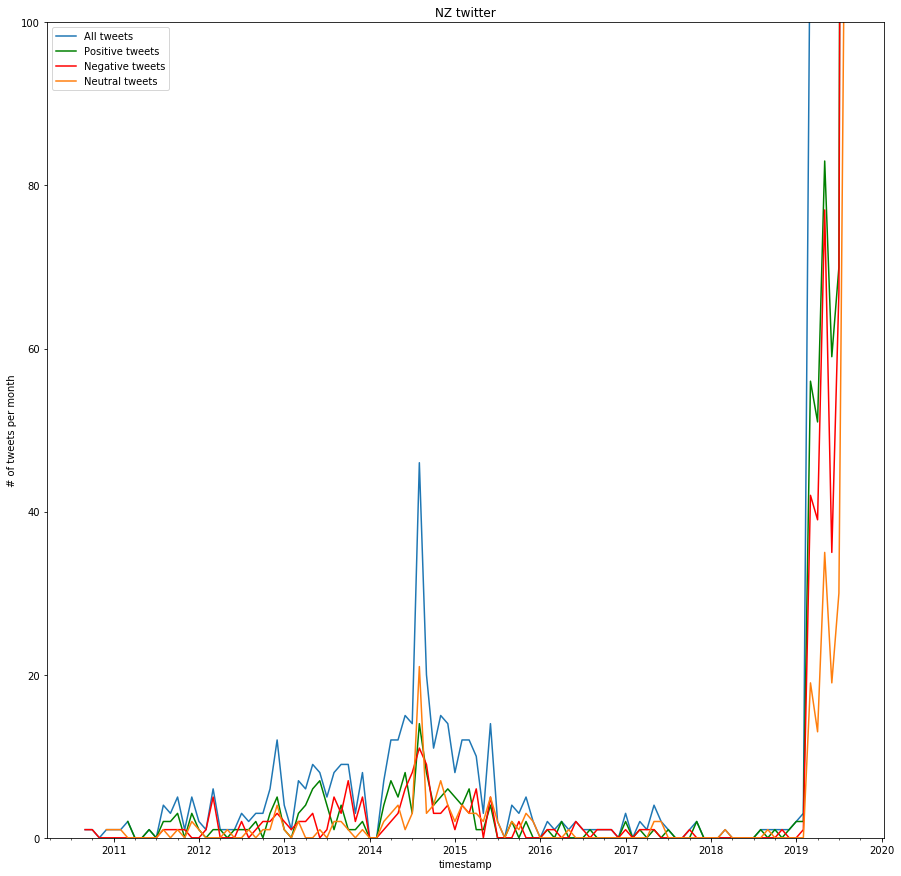

In [104]:
environmental_tweets.timestamp.resample("M").count().plot(figsize=(15,15), title="NZ twitter", ylim=(0, 100))
environmental_tweets.timestamp[environmental_tweets["compound"] > 0.05].resample("M").count().plot(color='g')
environmental_tweets.timestamp[environmental_tweets["compound"] < -0.05].resample("M").count().plot(color='r')
environmental_tweets.timestamp[environmental_tweets["compound"].between(-.05, .05)].resample("M").count().plot()
plt.legend(["All tweets", "Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()